<a href="https://colab.research.google.com/github/msl93/sdsphd20_portfolio_msl/blob/main/Martin_Sundahl_Laursen_sdsphd20_unsupervised_and_supervised_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD20

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [1]:
# standard packaging
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
import matplotlib.pyplot as plt # standard plotting library
from IPython.display import HTML #Youtube embed

In [2]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

#### 1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Species_short, island, and sex are categorical variables. We will drop these later for the PCA. The rest are numerical variables. We have 344 entries. All numerical variables have each 2 NaN values. The sex variable has 10 NaN values. We will also drop NaN rows later.

In [4]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### 2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data

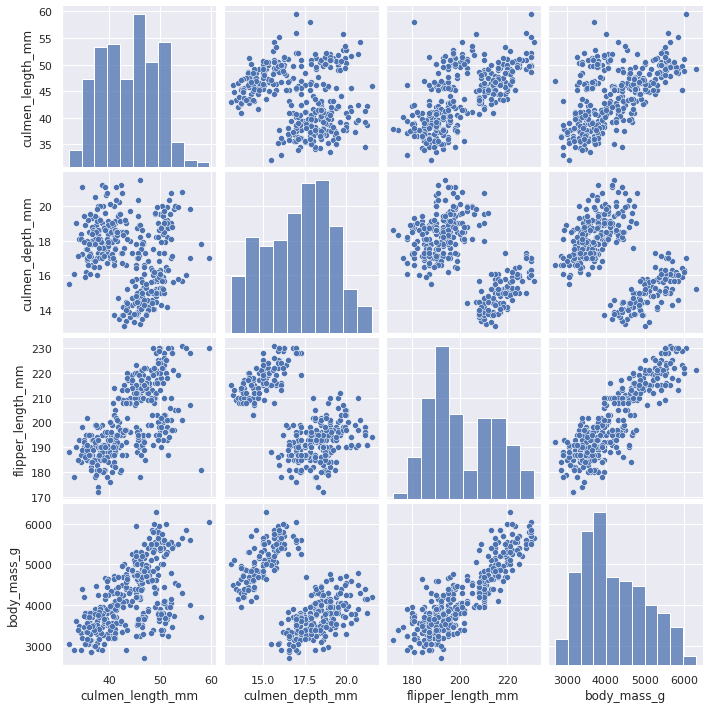

In [6]:
sns.pairplot(penguins)

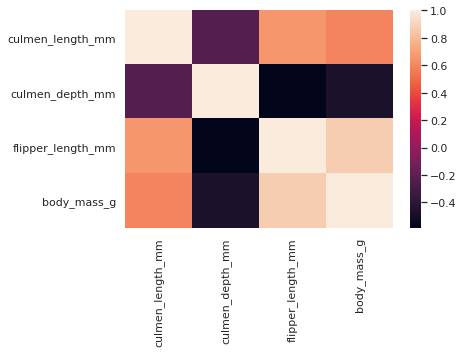

In [7]:
sns.heatmap(penguins.corr())

We see that some of the variables seem to be somewhat correlated, namely:


*   flipper_length_mm and body_mass_g
*   culmen_length_mm and body_mass_g
*   flipper_length_mm and culmen_length_mm

This means that we will probably be able to perform dimensionality reduction


#### 3. Create a new dataset where you scale all numeric values with the standardscaler.

In [8]:
#We first drop NaN rows
penguins_drop = penguins.dropna()

In [9]:
# Drop categorical variables as PCA only works on numerical variables
penguins_num = penguins_drop.select_dtypes(['number'])

In [10]:
penguins_num.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Let's standard-scale our data
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_num)

In [13]:
# What are mean and Sd now?
pd.DataFrame(penguins_scaled, columns=penguins_num.columns).describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,3.340000e+02,3.340000e+02,3.340000e+02,3.340000e+02
mean,4.055306e-16,-4.829803e-16,3.024859e-16,-4.015417e-16
std,1.001500e+00,1.001500e+00,1.001500e+00,1.001500e+00
min,-2.181505e+00,-2.066442e+00,-2.072325e+00,-1.877800e+00
25%,-8.242902e-01,-7.941526e-01,-7.867179e-01,-8.200995e-01
50%,9.274707e-02,7.100443e-02,-2.867596e-01,-1.979229e-01
75%,8.401325e-01,7.834867e-01,8.560021e-01,7.275647e-01
max,2.862200e+00,2.208451e+00,2.141609e+00,2.601872e+00


The numerical data has now been normalized to a mean of 0 and standard deviation of 1

#### 4. Perform a PCA analysis

In [14]:
# Instantiate a PCA object
model = PCA(n_components=4) # Number of components needs to be defined with n_components

In [15]:
# Fit the model
model.fit(penguins_scaled)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# Fit and transform the data
penguins_reduced = model.transform(penguins_scaled)

#### 5. Investigate the explained variance of the components... do we see an 'elbow'?

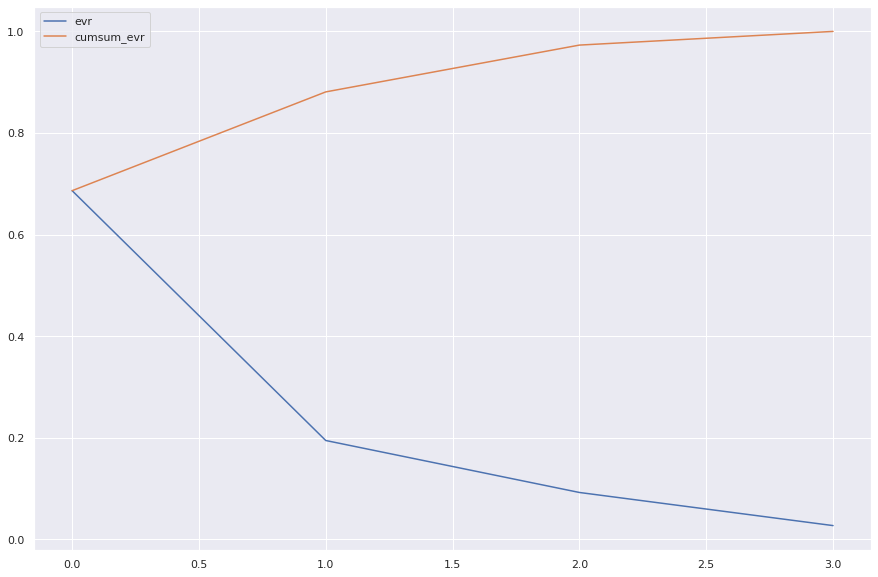

In [17]:
#Elbow plot
plot_penguins = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_penguins.values, x = plot_penguins.index.get_level_values(0), hue=plot_penguins.index.get_level_values(1))

We see an elbow at 2 principal components (x=1.0)

In [18]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

1.0

We don't lose any information because we have the same amount of principal components as variables

#### 6. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?

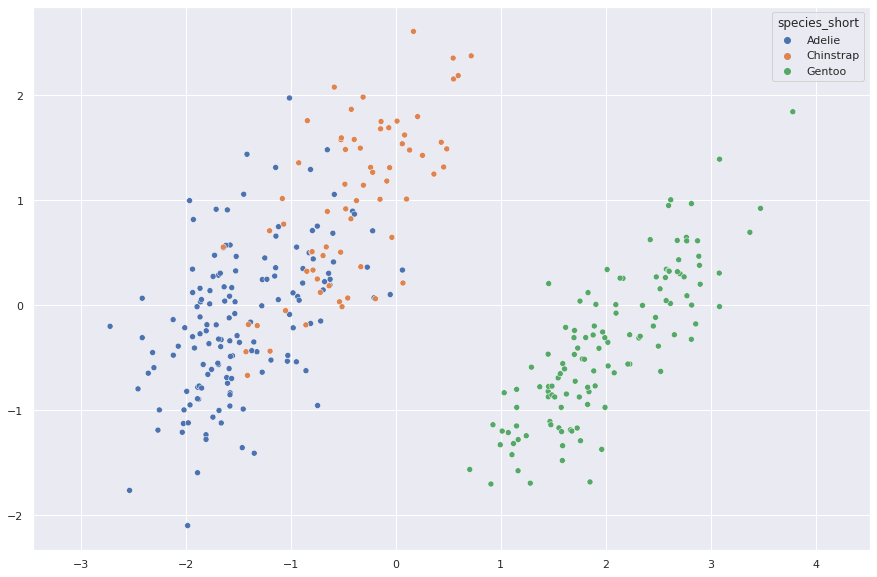

In [19]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = penguins_reduced[:,0], y = penguins_reduced[:,1], hue=penguins_drop.species_short)
plt.axis('equal')
plt.show()

We observe that the three different species are separated fairly well in the coordinate system. Gentoo has medium high to high values on the x-axis and low to medium values on the y-axis. Adelie has low x-values and low to medium y-values. Chinstrap has medium x-values and medium to high y-values.

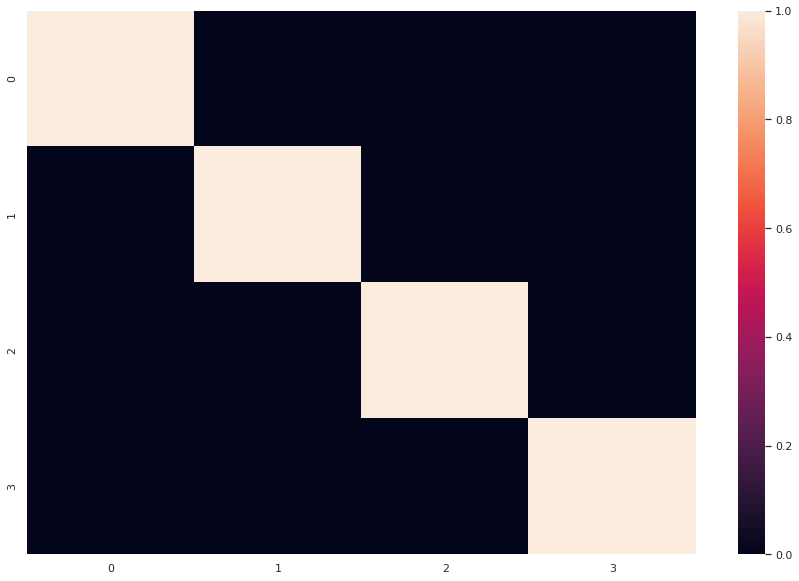

In [20]:
# Correlation of the components
sns.heatmap(pd.DataFrame(penguins_reduced).corr())

And now we have no correlation between our new variables (principal components)

Lets take a look how these components reorganize the data.

In [21]:
# Get the mean of the grain samples: mean
mean = model.mean_
print('mean:',mean)

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
print('first pc:',first_pc)
second_pc = model.components_[1,:]

mean: [-4.25474692e-17 -5.53117100e-16  8.93496853e-16 -1.27642408e-16]
first pc: [ 0.45330241 -0.39953853  0.57678201  0.54973485]


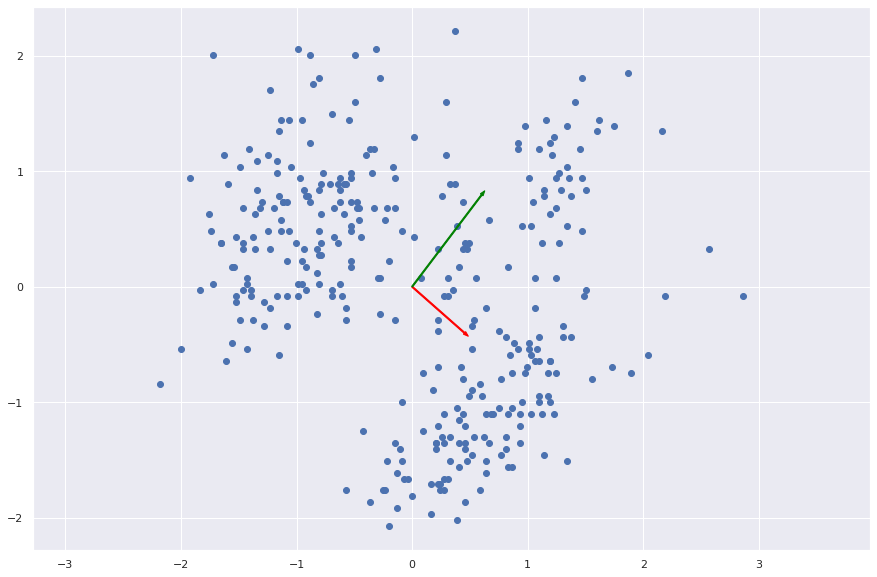

In [22]:
# Make a scatter plot of the untransformed points
plt.scatter(penguins_scaled[:,0], penguins_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

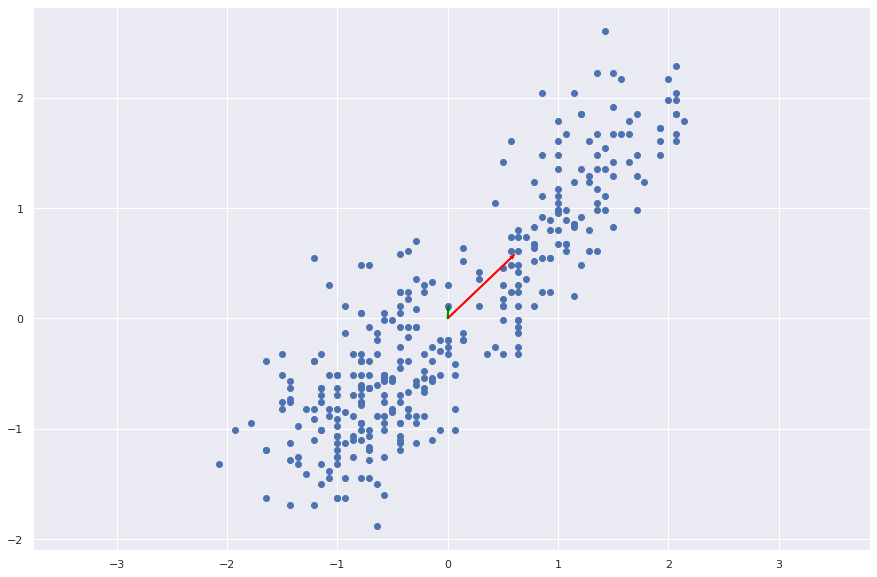

In [23]:
# Make a scatter plot of the untransformed points
plt.scatter(penguins_scaled[:,2], penguins_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

We see that the new orientation of the coordinate system has caused the axises to be along the highest variation in the data.

#### 7. Inspect the correlation between the components. Which variables are they mostly associated with?

In [24]:
#the components eigenvectors, which give us the loadings of all features on the components.
pcscores = pd.DataFrame(penguins_reduced)
loadings = pd.DataFrame(model.components_, columns=penguins_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

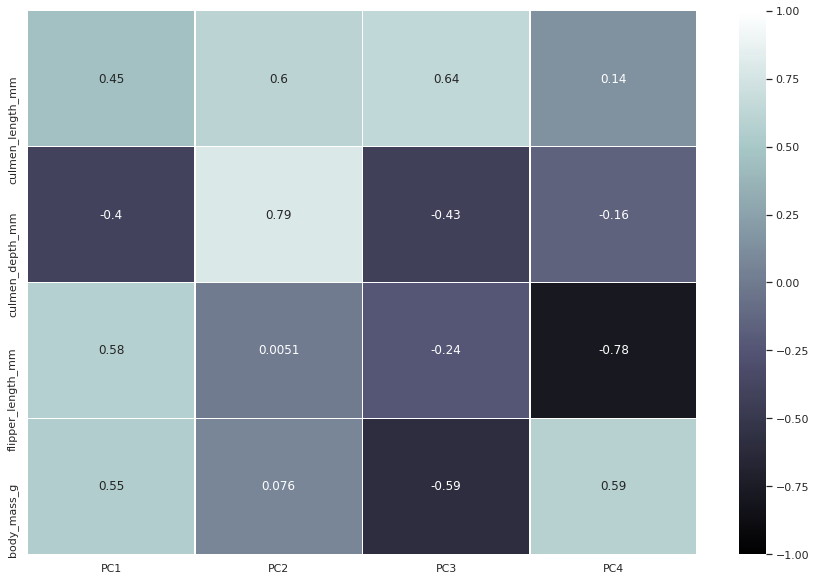

In [25]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

If we select 2 principal components as indicated by the elbow plot, we see that PC1 is positiviely correlated with body mass, flipper length, and culmen length. PC2 is positively correlated with culmen depth and culmen length.

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [26]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [27]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

#### 3. Apply standard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)

In [28]:
#We first drop NaN rows
penguins_drop = penguins.dropna()

In [29]:
# Choose the variables that we would like to use for a prediction
#penguins_num = penguins_drop.loc[:,['flipper_length_mm','culmen_length_mm','culmen_depth_mm','body_mass_g']]
penguins_num = penguins_drop.loc[:,['flipper_length_mm','body_mass_g']]

We only use flipper length and body mass as all tested models get 100% if all numerical variables are used for prediction.

In [30]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
# Apply the scaler to our X-features
penguins_scaled = scaler.fit_transform(penguins_num)

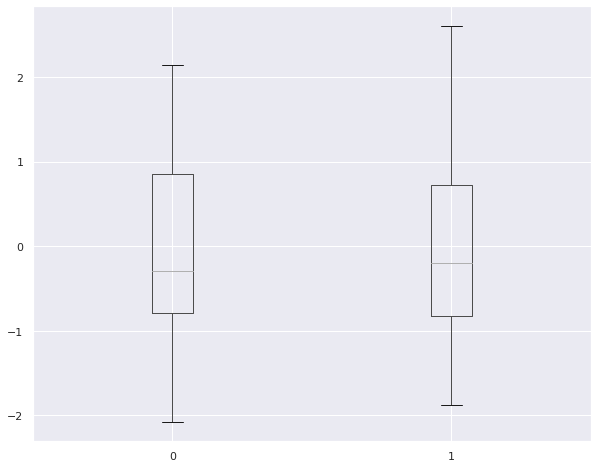

In [32]:
#Boxplots
pd.DataFrame(penguins_scaled).boxplot()

We do not see any outliers

In [33]:
#Define y
y=penguins_drop.species_short

In [34]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

#### 4. Split the data in a train & test sample

In [36]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(penguins_scaled, y_enc, test_size = 0.2, random_state = 42)

#### 5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.

In [37]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

*   Use first a logistic regression to do so.




In [38]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.83333333 0.75925926 0.77358491 0.83018868 0.77358491]


In [39]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.835820895522388


The model performs with an accuracy of 84% on the test set

In [40]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names = target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.77      0.97      0.86        31
   Chinstrap       0.67      0.31      0.42        13
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.84        67
   macro avg       0.81      0.74      0.75        67
weighted avg       0.83      0.84      0.81        67



In [41]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.4MB 9.3MB/s 


In [42]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f923bdd0438>)

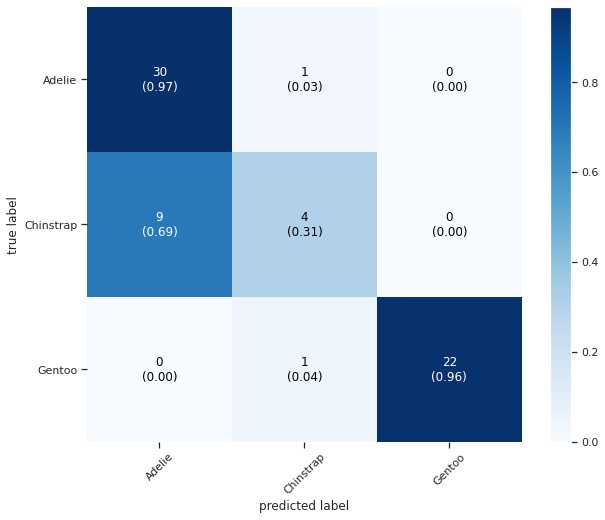

In [43]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

We see that the logistic regression classifies species from body mass, flipper length, culmen length, and culmen depth with 100% accuracy.



*   Then, use 2-3 more complex model classes of your choice.



We use a Random Forest to classify

In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.75925926 0.68518519 0.73584906 0.81132075 0.75471698]


In [45]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7761194029850746


The model performs with 78% accuracy on the test set.

In [46]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.76      0.81      0.78        31
   Chinstrap       0.42      0.38      0.40        13
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.78        67
   macro avg       0.72      0.72      0.72        67
weighted avg       0.77      0.78      0.77        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f923a5369b0>)

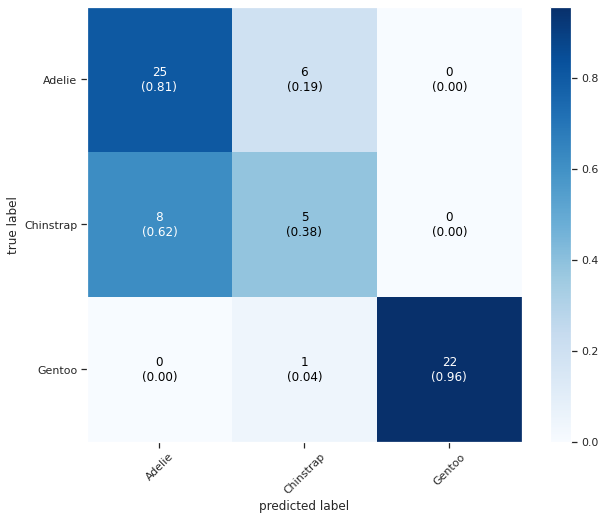

In [47]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

We use XGBoost to classify

In [48]:
import xgboost as xgb

model = xgb.XGBClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.75925926 0.72222222 0.71698113 0.77358491 0.75471698]
0.8805970149253731


The model performs with 88% accuracy on the test set.

In [49]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

              precision    recall  f1-score   support

      Adelie       0.83      0.97      0.90        31
   Chinstrap       0.78      0.54      0.64        13
      Gentoo       1.00      0.96      0.98        23

    accuracy                           0.88        67
   macro avg       0.87      0.82      0.84        67
weighted avg       0.88      0.88      0.87        67



(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f923a58ff98>)

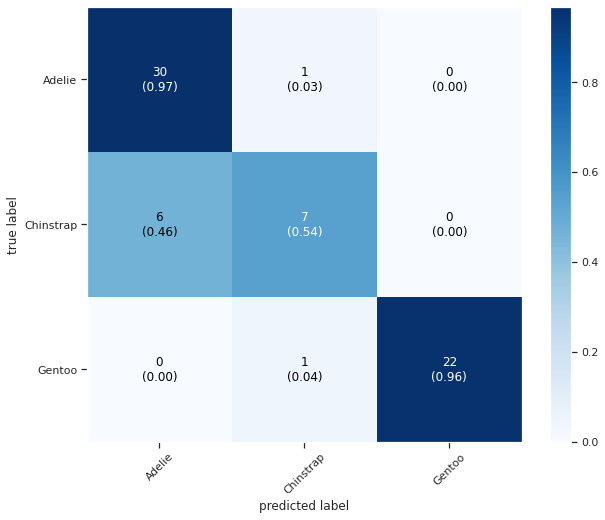

In [50]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)